In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original', data_home='/home/tuanlv/PycharmProjects/TrainingML/Day2')

In [3]:
print(mnist)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [4]:
print(mnist.data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
print(mnist.data.shape)

(70000, 784)


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=59, svd_solver=True)

In [8]:
pca.fit(mnist.data)

ValueError: Unrecognized svd_solver='True'

In [9]:
pca = PCA(n_components=59)

In [10]:
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=59, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
U = pca.components_.T

In [12]:
import matplotlib as plt

In [13]:
import matplotlib.pyplot as plt

In [14]:
fig = plt.figure(figsize = (8,8))

<Figure size 576x576 with 0 Axes>

In [15]:
fig = plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

In [17]:
fig = plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

In [18]:
import numpy as np

In [19]:
data = np.array(mnist.data)

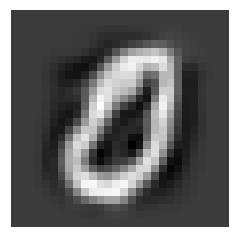

In [20]:
for i in range(1, 11):
    pixels = data[i]
    pixels = np.array(pixels, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    fig.add_subplot(4, 10, i)
    f0 = plt.imshow(pixels, cmap='gray')
    f0.axes.get_xaxis().set_visible(False)
    f0.axes.get_yaxis().set_visible(False)

    x = data[i].reshape(784, 1) - pca.mean_.reshape(784, 1)
    z = U.T.dot(x)
    x_tilde = U.dot(z) + pca.mean_.reshape(784, 1)
    fig.add_subplot(4, 10, i + 10)
    f1 = plt.imshow(x_tilde.reshape(28, 28), cmap='gray')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)

    fig.add_subplot(4, 10, i + 20)
    f2 = plt.imshow(U[:, i].reshape(28, 28), cmap='gray')
    f2.axes.get_xaxis().set_visible(False)
    f2.axes.get_yaxis().set_visible(False)

    mean = np.mean(data)
    x_n = data[i] - mean
    z_n = U.T.dot(x_n)
    y_n = U.dot(z_n) + mean
    fig.add_subplot(4, 10, i + 30)
    f3 = plt.imshow(y_n.reshape(28, 28), cmap='gray')
    f3.axes.get_xaxis().set_visible(False)
    f3.axes.get_yaxis().set_visible(False)
plt.gray()
plt.axis('off')
plt.show()